<a href="https://colab.research.google.com/github/andraroman12/PMP-2024/blob/main/TEMA2/ex1-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

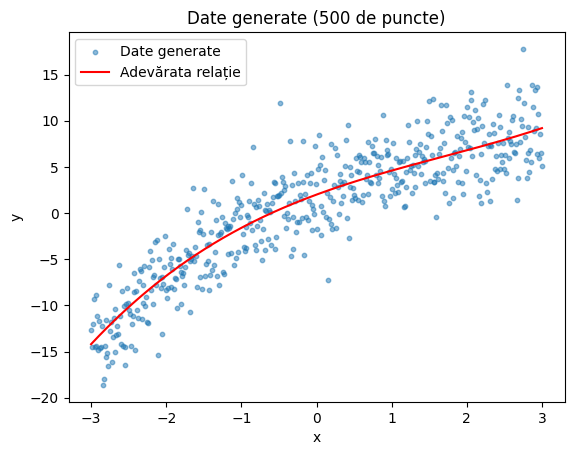

WAIC Linear: Computed from 4000 posterior samples and 500 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -339.47    16.52
p_waic        3.27        -
WAIC Quadratic: Computed from 4000 posterior samples and 500 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -279.56    17.22
p_waic        4.39        -
WAIC Cubic: Computed from 4000 posterior samples and 500 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -275.72    16.84
p_waic        5.17        -
LOO Linear: Computed from 4000 posterior samples and 500 observations log-likelihood matrix.

         Estimate       SE
elpd_loo  -339.48    16.52
p_loo        3.27        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      500  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

LOO Quadratic: Computed from 4000 posterior samples and 500

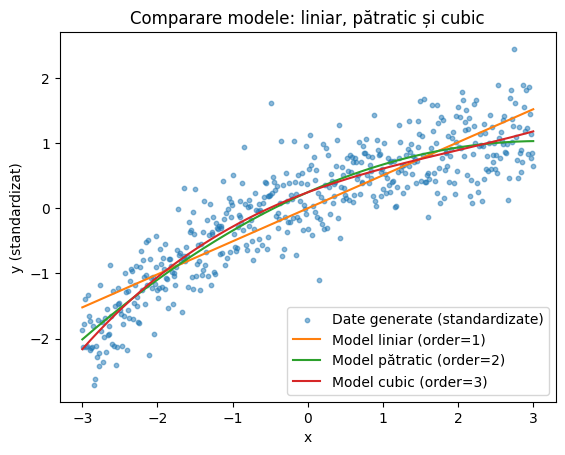

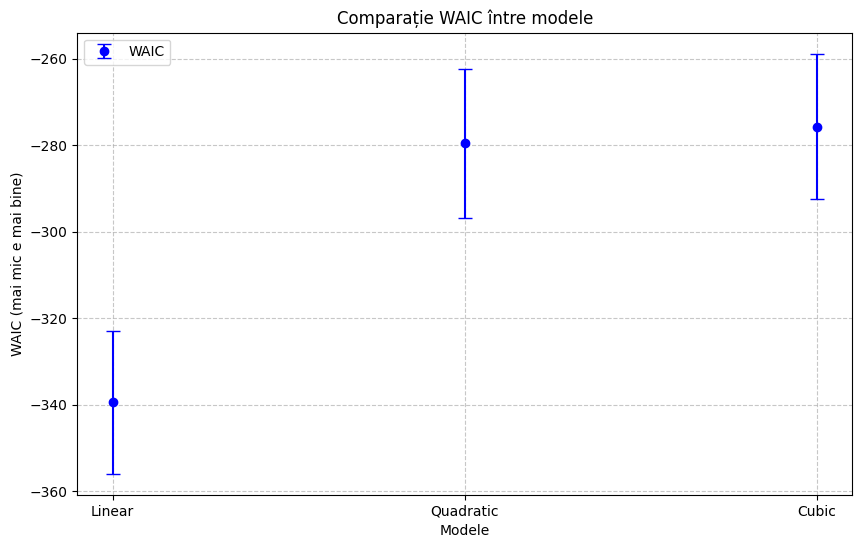

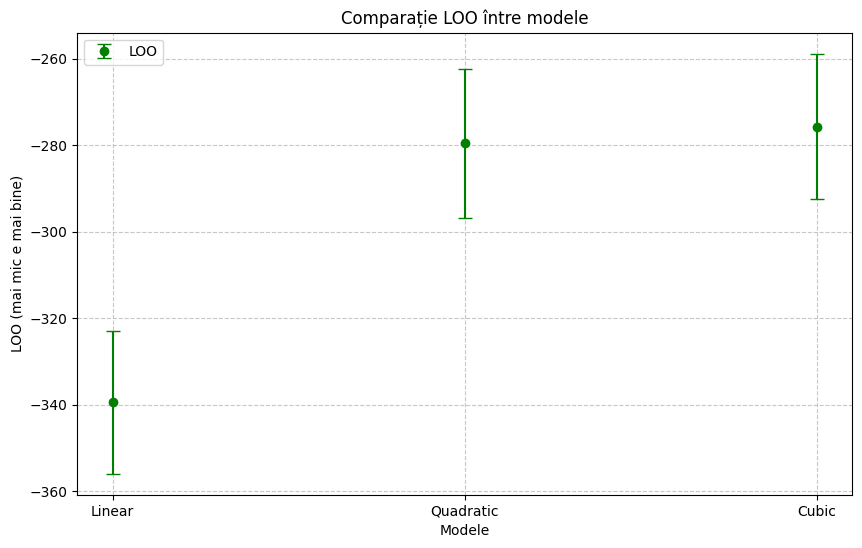

In [11]:

from google.colab import files
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import arviz as az

np.random.seed(42)
x_new = np.linspace(-3, 3, 500)
y_true = 2 + 3 * x_new - 0.5 * x_new**2 + 0.1 * x_new**3
noise = np.random.normal(0, 3, size=500)
y_new = y_true + noise

x_new_p = np.vstack([x_new**i for i in range(1, 4)])
x_new_s = (x_new_p - x_new_p.mean(axis=1, keepdims=True)) / x_new_p.std(axis=1, keepdims=True)
y_new_s = (y_new - y_new.mean()) / y_new.std()

plt.scatter(x_new, y_new, s=10, alpha=0.5, label='Date generate')
plt.plot(x_new, y_true, c='r', label='Adevărata relație')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Date generate (500 de puncte)')
plt.legend()
plt.show()

#model liniar
with pm.Model() as model_linear:
    α = pm.Normal('Intercept', mu=0, sigma=1)
    β = pm.Normal('Coeficienți', mu=0, sigma=10)
    ε = pm.HalfNormal('Eroare', 5)
    µ = α + β * x_new_s[0]
    y_pred = pm.Normal('y_pred', mu=µ, sigma=ε, observed=y_new_s)
    trace_linear = pm.sample(2000, tune=1500, target_accept=0.99, return_inferencedata=True, random_seed=42)

waic_linear = az.waic(trace_linear)
loo_linear = az.loo(trace_linear)

#model patratic
with pm.Model() as model_quadratic:
    α = pm.Normal('Intercept', mu=0, sigma=1)
    β = pm.Normal('Coeficienți', mu=0, sigma=10, shape=2)
    ε = pm.HalfNormal('Eroare', 5)
    µ = α + pm.math.dot(β, x_new_s[:2])
    y_pred = pm.Normal('y_pred', mu=µ, sigma=ε, observed=y_new_s)
    trace_quadratic = pm.sample(2000, tune=1500, target_accept=0.99, return_inferencedata=True, random_seed=42)

waic_quadratic = az.waic(trace_quadratic)
loo_quadratic = az.loo(trace_quadratic)

#model cubic
with pm.Model() as model_cubic:
    α = pm.Normal('Intercept', mu=0, sigma=1)
    β = pm.Normal('Coeficienți', mu=0, sigma=10, shape=3)
    ε = pm.HalfNormal('Eroare', 5)
    µ = α + pm.math.dot(β, x_new_s[:3])
    y_pred = pm.Normal('y_pred', mu=µ, sigma=ε, observed=y_new_s)
    trace_cubic = pm.sample(2000, tune=1500, target_accept=0.99, return_inferencedata=True, random_seed=42)

waic_cubic = az.waic(trace_cubic)
loo_cubic = az.loo(trace_cubic)


print("WAIC Linear:", waic_linear)
print("WAIC Quadratic:", waic_quadratic)
print("WAIC Cubic:", waic_cubic)
print("LOO Linear:", loo_linear)
print("LOO Quadratic:", loo_quadratic)
print("LOO Cubic:", loo_cubic)

#grafic pt modele
α_linear = trace_linear.posterior['Intercept'].mean(('chain', 'draw')).values
β_linear = trace_linear.posterior['Coeficienți'].mean(('chain', 'draw')).values
µ_linear = α_linear + β_linear * x_new_s[0]

α_quadratic = trace_quadratic.posterior['Intercept'].mean(('chain', 'draw')).values
β_quadratic = trace_quadratic.posterior['Coeficienți'].mean(('chain', 'draw')).values
µ_quadratic = α_quadratic + np.dot(β_quadratic, x_new_s[:2])

α_cubic = trace_cubic.posterior['Intercept'].mean(('chain', 'draw')).values
β_cubic = trace_cubic.posterior['Coeficienți'].mean(('chain', 'draw')).values
µ_cubic = α_cubic + np.dot(β_cubic, x_new_s[:3])

plt.scatter(x_new, y_new_s, c='C0', s=10, alpha=0.5, label='Date generate (standardizate)')
plt.plot(x_new, µ_linear, c='C1', label='Model liniar (order=1)')
plt.plot(x_new, µ_quadratic, c='C2', label='Model pătratic (order=2)')
plt.plot(x_new, µ_cubic, c='C3', label='Model cubic (order=3)')
plt.xlabel('x')
plt.ylabel('y (standardizat)')
plt.title('Comparare modele: liniar, pătratic și cubic')
plt.legend()
plt.show()

#grafice pentru WAIC și LOO
waic_values = [waic_linear.waic, waic_quadratic.waic, waic_cubic.waic]
waic_errors = [waic_linear.waic_se, waic_quadratic.waic_se, waic_cubic.waic_se]
loo_values = [loo_linear.loo, loo_quadratic.loo, loo_cubic.loo]
loo_errors = [loo_linear.loo_se, loo_quadratic.loo_se, loo_cubic.loo_se]
models = ['Linear', 'Quadratic', 'Cubic']

#grafic WAIC
plt.figure(figsize=(10, 6))
plt.errorbar(models, waic_values, yerr=waic_errors, fmt='o', capsize=5, label='WAIC', color='blue')
plt.title("Comparație WAIC între modele")
plt.ylabel("WAIC (mai mic e mai bine)")
plt.xlabel("Modele")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

#grafic LOO
plt.figure(figsize=(10, 6))
plt.errorbar(models, loo_values, yerr=loo_errors, fmt='o', capsize=5, label='LOO', color='green')
plt.title("Comparație LOO între modele")
plt.ylabel("LOO (mai mic e mai bine)")
plt.xlabel("Modele")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()
